In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

import statsmodels.formula.api as sm

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
mpg_df = pd.read_csv("car-mpg.csv")  
mpg_df = mpg_df.drop('car_name', axis=1)
mpg_df['origin'] = mpg_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
mpg_df = pd.get_dummies(mpg_df, columns=['origin'])
mpg_df = mpg_df.replace('?', np.nan)
mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)

# separate independent and dependent variables

In [3]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = mpg_df.drop('mpg', axis=1)
# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = mpg_df[['mpg']]

In [4]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  # ideally the training and test should be 

C:\Users\DILIP\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [6]:
from statsmodels.api import add_constant
X2 = add_constant(X_train)

C:\Users\DILIP\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
lm= sm.OLS(y_train,X2)
lm2=lm.fit()
lm2.params

const             23.665108
cyl                2.505952
disp               2.535708
hp                -1.788934
wt                -5.551820
acc                0.114857
yr                 2.931847
car_type           2.977870
origin_america    -0.583296
origin_asia        0.347493
origin_europe      0.377416
dtype: float64

In [8]:
lm2.pvalues

const             2.923195e-235
cyl                4.632119e-03
disp               1.152784e-02
hp                 3.853771e-03
wt                 1.727627e-14
acc                7.094149e-01
yr                 1.353403e-30
car_type           2.728174e-08
origin_america     2.402682e-04
origin_asia        3.051981e-02
origin_europe      2.398793e-02
dtype: float64

In [9]:
#to see the summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 10 Aug 2019   Prob (F-statistic):           3.12e-99
Time:                        20:54:11   Log-Likelihood:                -718.16
No. Observations:                 278   AIC:                             1456.
Df Residuals:                     268   BIC:                             1493.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             23.6651      0.197    120.

In [10]:
X2_test = add_constant(X_test)
y_test_predict = lm2.predict(X2_test)

In [11]:
len(list(y_test_predict))

120

In [12]:
y_test.mpg

174    18.0
359    28.1
250    19.4
274    20.3
283    20.2
232    16.0
117    29.0
348    37.7
189    15.5
106    12.0
371    29.0
222    17.0
261    18.1
242    21.5
343    39.1
179    22.0
5      15.0
125    20.0
90     12.0
303    31.8
173    24.0
233    29.0
17     21.0
29     27.0
315    24.3
102    26.0
356    32.4
246    32.8
4      17.0
388    26.0
       ... 
290    15.5
127    19.0
165    20.0
299    27.2
197    29.0
107    18.0
331    33.8
172    25.0
82     23.0
366    17.6
192    22.0
27     11.0
89     15.0
310    38.1
73     13.0
249    19.9
311    32.1
122    24.0
360    30.7
214    13.0
98     16.0
320    37.0
334    23.7
163    18.0
119    20.0
382    34.0
39     14.0
171    24.0
271    23.2
247    39.4
Name: mpg, Length: 120, dtype: float64

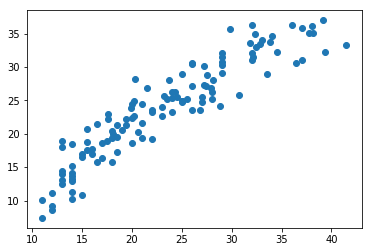

In [13]:
from matplotlib import pyplot as plt
plt.scatter(list(y_test.mpg), list(y_test_predict))
plt.show()

### Forward and Backward Regression

In [20]:
import statsmodels.formula.api as smf
def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        print(best_candidate)
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [21]:
data_fs = pd.concat([X2, y_train], axis=1) 

In [22]:
model = forward_selected(data_fs, 'mpg')

wt
yr
car_type
cyl
hp
origin_america
disp
const


In [24]:
#to see the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     194.2
Date:                Sun, 17 Feb 2019   Prob (F-statistic):          1.75e-101
Time:                        07:53:21   Log-Likelihood:                -718.25
No. Observations:                 278   AIC:                             1452.
Df Residuals:                     270   BIC:                             1482.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         23.6673      0.196    120.

In [25]:
y_test_predict = model.predict(X2_test)

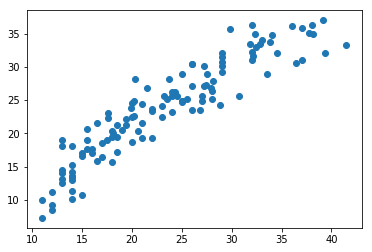

In [26]:
from matplotlib import pyplot as plt
plt.scatter(list(y_test.mpg), list(y_test_predict))
plt.show()

# fit a simple linear model

In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is 2.5059518049385052
The coefficient for disp is 2.5357082860560483
The coefficient for hp is -1.7889335736325294
The coefficient for wt is -5.551819873098725
The coefficient for acc is 0.11485734803440854
The coefficient for yr is 2.931846548211609
The coefficient for car_type is 2.977869737601944
The coefficient for origin_america is -0.5832955290166003
The coefficient for origin_asia is 0.3474931380432235
The coefficient for origin_europe is 0.3774164680868855


# Create a regularized RIDGE model and note the coefficients

In [7]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[ 2.47057467  2.44494419 -1.78573889 -5.47285499  0.10115618  2.92319984
   2.94492098 -0.57949986  0.34667456  0.37344909]]


# Create a regularized LASSO model and note the coefficients

In [9]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 1.10693517  0.         -0.71587138 -4.2127655  -0.          2.73245903
  1.66333749 -0.63587683  0.          0.        ]


## Let us compare their scores

In [10]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))


0.8343770256960538
0.8513421387780066


In [11]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8343617931312615
0.8518882171608504


In [12]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8211445134781438
0.8577234201035426


In [13]:
# More or less similar results but with less complex models.  Complexity is a function of variables and coefficients
## Note - with Lasso, we get equally good result in test though not so in training.  Further, the number of dimensions is much less
# in LASSO model than ridge or un-regularized model

# Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [16]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(278, 56)

# Fit a simple non regularized linear model on poly features-

In [17]:
regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[-9.67853872e-13 -1.06672046e+12 -4.45865268e+00 -2.24519565e+00
 -2.96922206e+00 -1.56882955e+00  3.00019063e+00 -1.42031640e+12
 -5.46189566e+11  3.62350196e+12 -2.88818173e+12 -1.16772461e+00
 -1.43814087e+00 -7.49492645e-03  2.59439087e+00 -1.92409515e+00
 -3.41759793e+12 -6.27534905e+12 -2.44065576e+12 -2.32961194e+12
  3.97766113e-01  1.94046021e-01 -4.26086426e-01  3.58203125e+00
 -2.05296326e+00 -7.51019934e+11 -6.18967069e+11 -5.90805593e+11
  2.47863770e-01 -6.68518066e-01 -1.92150879e+00 -7.37030029e-01
 -1.01183732e+11 -8.33924574e+10 -7.95983063e+10 -1.70394897e-01
  5.25512695e-01 -3.33097839e+00  1.56301740e+12  1.28818991e+12
  1.22958044e+12  5.80200195e-01  1.55352783e+00  3.64527008e+11
  3.00431724e+11  2.86762821e+11  3.97644043e-01  8.58604718e+10
  7.07635073e+10  6.75439422e+10 -7.25449332e+11  1.00689540e+12
  9.61084146e+11  2.18532428e+11 -4.81675252e+12  2.63818648e+12]


In [18]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          3.73512981 -2.93500874 -2.13974194 -3.56547812 -1.28898893
   3.01290805  2.04739082  0.0786974   0.21972225 -0.3302341  -1.46231096
  -1.17221896  0.00856067  2.48054694 -1.67596093  0.99537516 -2.29024279
   4.7699338  -2.08598898  0.34009408  0.35024058 -0.41761834  3.06970569
  -2.21649433  1.86339518 -2.62934278  0.38596397  0.12088534 -0.53440382
  -1.88265835 -0.7675926  -0.90146842  0.52416091  0.59678246 -0.26349448
   0.5827378  -3.02842915 -0.36548074  0.5956112  -0.15941014  0.49168856
   1.45652375 -0.43819158 -0.20964198  0.77665496  0.36489921 -0.4750838
   0.3551047   0.23188557 -1.42941282  2.06831543 -0.34986402 -0.32320394
   0.39054656  0.06283411]]


In [19]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.9143225702003366
0.8613398053698552


In [22]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.          0.52263805 -0.5402102  -1.99423315 -4.55360385 -0.85285179
  2.99044036  0.00711821 -0.          0.76073274 -0.         -0.
 -0.19736449  0.          2.04221833 -1.00014513  0.         -0.
  4.28412669 -0.          0.          0.31442062 -0.          2.13894094
 -1.06760107  0.         -0.          0.          0.         -0.44991392
 -1.55885506 -0.         -0.68837902  0.          0.17455864 -0.34653644
  0.3313704  -2.84931966  0.         -0.34340563  0.00815105  0.47019445
  1.25759712 -0.69634581  0.          0.55528147  0.2948979  -0.67289549
  0.06490671  0.         -1.19639935  1.06711702  0.         -0.88034391
  0.         -0.        ]


In [23]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))


0.9098286193898272
0.8695296858772456
